In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Definition of environment

In [2]:
env=[0,1,2,3,4,5,6,7]
dist1=[0,1,1.848,2.414,2.613,2.414,1.848,1]
k=1
dist=[i/k for i in dist1]
total_score=[]

Actions

In [3]:
actions=[0,1,2,3,4,5,6,7]

Rewards

In [4]:
rewards=[70,0,0,70,70,0,70,0]
reward_update_rate = [8, 0, 0, 2, 2 , 0, 8, 0]

Help Functions

In [5]:
def get_starting_location():
    current_place = np.random.randint(8)
    return current_place

epsilon decay

In [6]:
def get_next_action(current_env_index,time,c_epsilon,e_epsilon,flag):
    f=0
    if (c_epsilon<=e_epsilon):
        c_epsilon=e_epsilon
        f=1
    else:
        c_epsilon=0.99*c_epsilon
    if np.random.random()<0.1:     
      if (flag and f):
        if np.random.random()<1-c_epsilon:
          return np.argmax(Q[current_env_index]),c_epsilon
        else:
          if (rewards[current_env_index]>0):
            return current_env_index,c_epsilon
          else:
            return np.argmax(Q[current_env_index]),c_epsilon
    if np.random.random()<1-c_epsilon:
        return np.argmax(Q[current_env_index]),c_epsilon
    else: 
        return np.random.randint(8),c_epsilon

In [7]:
def get_next_location(current_env_index,action_index):
    new_env_index = action_index
    index_difference=abs(current_env_index-action_index)
    return new_env_index,index_difference

In [8]:
def mesaure_and_update_rewards(current_env_index,time,index_difference,rewards):
    time=time+1+dist[index_difference]
    re=rewards[current_env_index]
    for i in range(len(rewards)):
        if(i!=current_env_index):
            if(reward_update_rate[i]+rewards[i]>200):
                rewards[i]=200
            else:   
                rewards[i]=reward_update_rate[i]+rewards[i]
        else:
            rewards[i]=0.9*rewards[i]
    #print(rewards)
    return time,re,rewards

In [9]:
def updateQtable(timetaken,prev_env_index,action_index,reward,avg_reward,c_epsilon,e_epsilon):
    da=0
    current_patch=action_index
    next_action,da=get_next_action(current_patch,da,c_epsilon,e_epsilon,0)
    Q[prev_env_index,action_index]=(1-alpha)*Q[prev_env_index,action_index] + alpha*(reward+gamma*Q[current_patch, next_action])
    

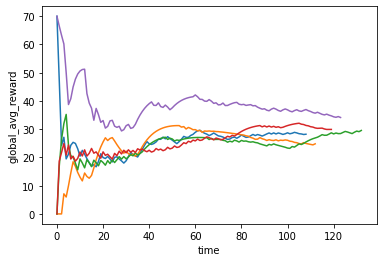

In [10]:
    e_epsilon=0.2
    c_epsilon=1
    gamma=0.99
    alpha=0.95
    Q=np.zeros(shape=(8,8))
    for i in range(5):
        rewards=[70,0,0,70,70,0,70,0]
        time=0
        current_patch=get_starting_location()
        cums=0
        avg_reward=0
        global_avg_reward=[]
        indexdif=0
        flag=0
        st=[]
        D=[]
        while(time<300):
            next_action,c_epsilon=get_next_action(current_patch,time,c_epsilon,e_epsilon,flag)
            D.append(current_patch)
            time1,re,rewards=mesaure_and_update_rewards(current_patch,time,indexdif,rewards)
            cums=cums+re
            updateQtable(time1-time,current_patch,next_action,re,avg_reward,c_epsilon,e_epsilon)
            current_patch,indexdif=get_next_location(current_patch,next_action)
            time=time1
            avg_reward=cums/time
            if (re>avg_reward):
              flag=0
            else:
              flag=1
            global_avg_reward.append(avg_reward)
            #print(rewards)
            st.append(time)
        plt.plot(global_avg_reward)
        plt.ylabel("global_avg_reward")
        plt.xlabel("time")
        

In [11]:
len(st)

124

In [12]:
cums

10254.157478035828

In [13]:
print(Q)

[[4.76229142e+02 1.82106175e+02 2.41018012e+03 2.78447096e+02
  1.98181855e+02 2.64832980e+02 1.72022974e+02 2.35905837e+02]
 [2.61879494e+02 8.23489407e+01 1.08387518e+02 3.81173681e+02
  1.74701659e+02 0.00000000e+00 2.93861707e+01 2.02235981e+03]
 [2.37231015e-01 2.01564786e+03 0.00000000e+00 0.00000000e+00
  1.99688229e+02 1.61337562e+01 8.04775034e+01 1.09008716e+02]
 [2.32956506e+03 2.66943614e+02 8.27925000e+01 2.49532250e+02
  6.65000000e+01 7.83493500e+01 1.36896383e+03 0.00000000e+00]
 [1.71046638e+03 2.35216847e+02 7.99412707e+01 4.15499140e+02
  3.16144486e+02 1.05509297e+02 1.98763045e+02 2.22159099e+02]
 [3.82041107e+02 0.00000000e+00 0.00000000e+00 5.44200582e+02
  8.07995516e+01 0.00000000e+00 0.00000000e+00 2.15523537e+03]
 [1.12100000e+02 5.58001781e+02 2.65621576e+02 0.00000000e+00
  0.00000000e+00 1.11356389e+03 1.37160791e+02 2.46123126e+02]
 [8.23084664e+02 3.67633069e+01 3.21615218e+01 2.62518221e+01
  1.70260743e+03 2.92230730e+00 1.84601808e+02 7.67804485e+02]]

In [14]:
steps_taken=0
epsilone=1
while(epsilone>0.2):
  epsilone=0.99*epsilone
  steps_taken +=1
print(steps_taken)

161
